<a href="https://colab.research.google.com/github/dprobity/pytorch/blob/main/pytorch_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:00<00:00, 61.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.90MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.64MB/s]


Starting training...
Epoch 1/5, Average Loss: 2.3044
Epoch 2/5, Average Loss: 2.3044
Epoch 3/5, Average Loss: 2.3044
Epoch 4/5, Average Loss: 2.3044
Epoch 5/5, Average Loss: 2.3044

Training complete! Testing model...


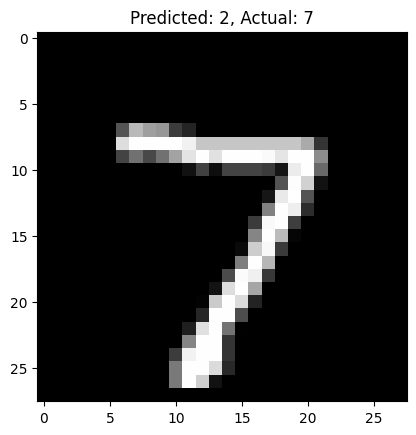

Predicted: 2, Actual: 7


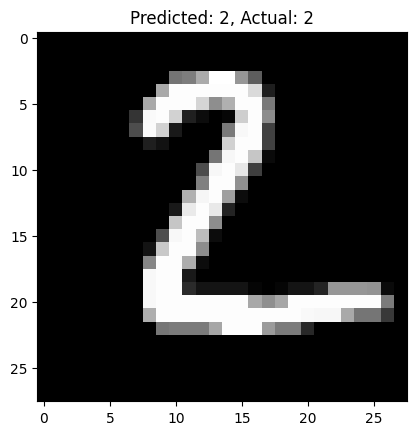

Predicted: 2, Actual: 2


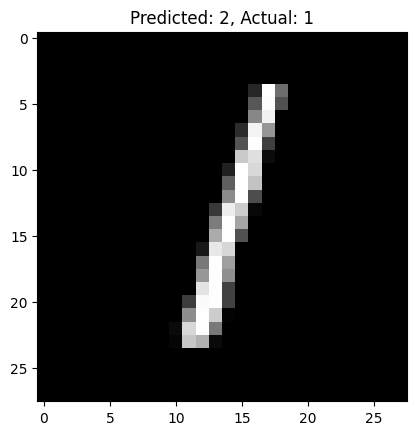

Predicted: 2, Actual: 1


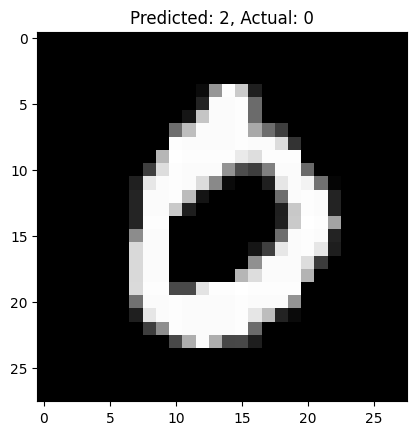

Predicted: 2, Actual: 0


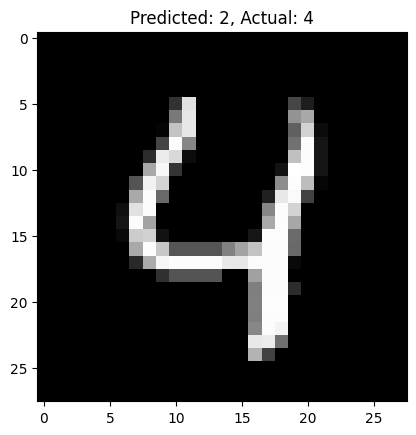

Predicted: 2, Actual: 4


In [8]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)


class DigitRecognit(nn.Module):
    def __init__(self):
        super().__init__()
        self.first_layer = nn.Linear(in_features=784, out_features=512)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.projection = nn.Linear(in_features=512, out_features=10)
        self.sigmoid = nn.Sigmoid()

    def forward(self, images):
        out = self.sigmoid(self.projection(self.dropout(self.relu(self.first_layer(images)))))
        return torch.round(out, decimals=4)


xmodel = DigitRecognit()

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(xmodel.parameters(), lr=0.001)

epochs = 5

print("Starting training...")
for epoch in range(epochs):
    xmodel.train()
    total_loss = 0
    for batch_idx, (images, labels) in enumerate(train_dataloader):
        images = images.view(images.shape[0], 784)   # transforming or reshaping the image input 28 * 28 into a format our neural network input architecture is designed to accept data

        # TRAINING BODY
        model_prediction = xmodel(images)
        optimizer.zero_grad() # clears all the previous_w or old_w in memory so that we dont add them up in future updates
        loss = loss_function(model_prediction, labels)
        loss.backward() # this does the actual derivative computation for all the params
        optimizer.step() # runs the weight updating -> new_w = old_w - derivative * learning_rate

        total_loss += loss.item()

    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}/{epochs}, Average Loss: {avg_loss:.4f}")

print("\nTraining complete! Testing model...")

xmodel.eval()
with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.view(images.shape[0], 784)
        model_prediction = xmodel(images)
        max_vals, idx = torch.max(model_prediction, dim=1)

        for i in range(min(5, len(images))):  # Show only first 5 images
            plt.imshow(images[i].view(28, 28), cmap='gray')
            plt.title(f"Predicted: {idx[i].item()}, Actual: {labels[i].item()}")
            plt.show()
            print(f"Predicted: {idx[i].item()}, Actual: {labels[i].item()}")
        break

In [13]:
# we do matrix, gradient computations using tensors


import torch
import torch.nn as nn


a  = torch.ones(5,6)

print(a)

sum = torch.sum(a, 1)

sum



[x,y] = a.size()

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])


In [2]:
import numpy as np

# Creating a 2D array
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(arr)

print(arr.shape)

[[1 2 3 4]
 [5 6 7 8]]
(2, 4)


In [17]:
import torch

from math import sqrt
import numpy as np

a = torch.tensor([[
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9],
     [10, 11, 12]]
]])


print(a)


print(a.shape)


squeezed = torch.squeeze(a)

print(squeezed)
print(squeezed.shape)

unsqqueezed = torch.unsqueeze(squeezed, dim=1)

print(unsqqueezed)
print(unsqqueezed.shape)

tensor([[[[ 1,  2,  3],
          [ 4,  5,  6],
          [ 7,  8,  9],
          [10, 11, 12]]]])
torch.Size([1, 1, 4, 3])
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
torch.Size([4, 3])
tensor([[[ 1,  2,  3]],

        [[ 4,  5,  6]],

        [[ 7,  8,  9]],

        [[10, 11, 12]]])
torch.Size([4, 1, 3])


In [21]:
## Neural nets

# Constructor

# Forward -> get_model_prediction(example_datapoint)

import torch.nn as nn
import torch.nn.functional as F

class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.first_layer = nn.Linear(in_features=4, out_features=6)
    self.second_layer = nn.Linear(in_features=6, out_features=6)
    self.thrid_layer = nn.Linear(in_features=6, out_features=2)

  def forward(self, x):
    first_layer_output = self.first_layer(x)
    second_layer_output = self.second_layer(first_layer_output)
    thrid_layer_output = self.thrid_layer(second_layer_output)
    return thrid_layer_output

    # we can return then chain of computations as a oneliner to make it more concise --->>> self.third_layer(self.second_layer(self.first_layer(x)))


model = MyModel()

example_datapoint = torch.rand(1,4)


print(model(example_datapoint))












tensor([[ 0.1177, -0.3896]], grad_fn=<AddmmBackward0>)


In [11]:
import torch

import torch.nn as nn


a = torch.arange(0, 5)

print(a)


b= torch.arange(4.)

print(b)

tensor([0, 1, 2, 3, 4])
tensor([0., 1., 2., 3.])


In [32]:
import torch
# # Original tensor with a singleton dimension
# x = torch.tensor([[[1, 2, 3, 4]]]) # Shape: (1, 1, 4)
# # Using torch.squeeze to remove singleton dimensions
# squeezed = x.squeeze() # Shape: (4,)
# # Using torch.reshape to achieve the same result
# reshaped = x.reshape(4) # Shape: (4,)
# print("Original shape:", x.shape)
# print("After squeeze:", squeezed.shape)
# print("After reshape:", reshaped.shape)



# a = torch.tensor([
#      [1, 2, 3],
#      [4, 5, 6],
#      [7, 8, 9],
#      [10, 11, 12]]
# )


# avg_row = torch.mean(a, dim=1)

# print(avg_row)


a = torch.tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

avg_row = a.float().mean(dim=0)
print(avg_row)


tensor([5.5000, 6.5000, 7.5000])


In [4]:
import torch
import torch.nn as nn

class MyModel_with_Dropout(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(42) # am not sure what this line does maybe seeding for reproducibilty when initialzing
    self.first_layer = nn.Linear(in_features=784, out_features=512)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.2)
    self.second_layer = nn.Linear(in_features=512, out_features=10)
    self.sigmoid = nn.Sigmoid()



  def forward(self, images):
    out = self.sigmoid(self.second_layer(self.dropout(self.relu(self.first_layer(images)))))
    return torch.round(out, decimals=4)


model = MyModel_with_Dropout()

NameError: name 'train_dataloader' is not defined